In [1]:
import numpy as np
import pandas as pd
import random
from scipy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, argparse
import multiprocessing as mp

# machine learning
import sklearn.cluster
import sklearn
import sklearn.preprocessing
import sklearn.decomposition

#--- custom libs
wdir = "/work/kaggle/molecules/src"
if wdir:
    sys.path.insert(0, wdir)
import sfuncs as sff
import funcs as ff

plt.style.use('dark_background')

In [2]:
!ls

contributions.ipynb	   structures_teest.ipynb  Untitled.ipynb
descriptor_hist.ipynb	   symmetry_funcs.ipynb
descriptors_cluster.ipynb  test.csv


In [3]:
df = pd.read_csv("../data/postproc/descriptors_sample.csv", sep=';')

In [4]:
df.head()

Unnamed: 0     molecule_name  atom_index  desc_g2ang_00  desc_g2ang_01  \
0           0  dsgdb9nsd_073799           0       0.547233       0.029197   
1           1  dsgdb9nsd_073799           1       0.094606       0.000555   
2           2  dsgdb9nsd_073799           2       0.091354       0.000446   
3           3  dsgdb9nsd_073799           3       0.548031       0.029286   
4           4  dsgdb9nsd_073799           4       0.086203       0.000814   

   desc_g2ang_02  desc_g2ang_03  desc_g2ang_04  desc_g2ang_05  desc_g2rad_00  \
0       6.160965       2.874391      48.005857      21.877733       2.930076   
1       7.521452       1.480662      81.585363      36.027836       3.222217   
2       7.452496       1.438356      90.420206      40.950256       3.064127   
3       6.247297       2.903426      57.968340      25.731346       2.928051   
4       9.040215       2.268404      85.743853      45.369535       4.261345   

   desc_g2rad_01  desc_g2rad_02  desc_g2rad_03  
0       3.070760       4.405743       3.178821  
1       6.688551       5.392217       0.347580  
2       9.215784       4.079353       0.014046  
3       3.225681       6.440143       1.774062  
4       6.875405       3.627894       0.844526

In [35]:
df.columns

Index(['Unnamed: 0', 'molecule_name', 'atom_index', 'desc_g2ang_00',
       'desc_g2ang_01', 'desc_g2ang_02', 'desc_g2ang_03', 'desc_g2ang_04',
       'desc_g2ang_05', 'desc_g2rad_00', 'desc_g2rad_01', 'desc_g2rad_02',
       'desc_g2rad_03'],
      dtype='object')

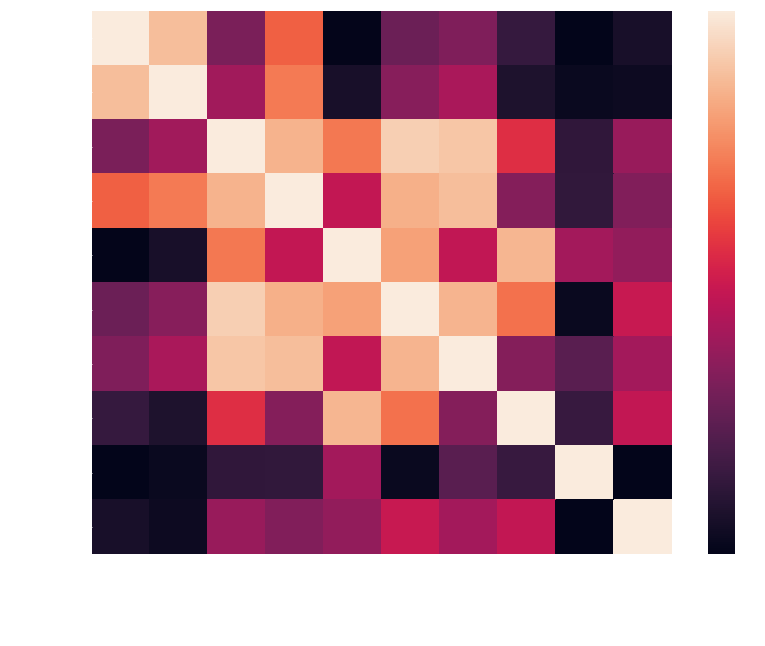

In [36]:
corr = df.drop(["Unnamed: 0", "molecule_name", "atom_index"], axis=1).corr()

plt.figure(figsize=(13,10))
sns.heatmap(np.abs(corr))

In [37]:
np.abs(corr)

desc_g2ang_00  desc_g2ang_01  desc_g2ang_02  desc_g2ang_03  \
desc_g2ang_00       1.000000       0.882939       0.314889       0.669127   
desc_g2ang_01       0.882939       1.000000       0.401105       0.720110   
desc_g2ang_02       0.314889       0.401105       1.000000       0.853594   
desc_g2ang_03       0.669127       0.720110       0.853594       1.000000   
desc_g2ang_04       0.011577       0.069391       0.717603       0.479640   
desc_g2ang_05       0.278858       0.343277       0.924241       0.846459   
desc_g2rad_00       0.326841       0.420480       0.901149       0.880925   
desc_g2rad_01       0.144439       0.085015       0.560864       0.336652   
desc_g2rad_02       0.003965       0.028230       0.128565       0.133177   
desc_g2rad_03       0.068098       0.037532       0.384408       0.327262   

               desc_g2ang_04  desc_g2ang_05  desc_g2rad_00  desc_g2rad_01  \
desc_g2ang_00       0.011577       0.278858       0.326841       0.144439   
desc_g2ang_01       0.069391       0.343277       0.420480       0.085015   
desc_g2ang_02       0.717603       0.924241       0.901149       0.560864   
desc_g2ang_03       0.479640       0.846459       0.880925       0.336652   
desc_g2ang_04       1.000000       0.810200       0.476364       0.860888   
desc_g2ang_05       0.810200       1.000000       0.856797       0.703291   
desc_g2rad_00       0.476364       0.856797       1.000000       0.337602   
desc_g2rad_01       0.860888       0.703291       0.337602       1.000000   
desc_g2rad_02       0.406432       0.028734       0.236529       0.150265   
desc_g2rad_03       0.369640       0.490898       0.408392       0.480870   

               desc_g2rad_02  desc_g2rad_03  
desc_g2ang_00       0.003965       0.068098  
desc_g2ang_01       0.028230       0.037532  
desc_g2ang_02       0.128565       0.384408  
desc_g2ang_03       0.133177       0.327262  
desc_g2ang_04       0.406432       0.369640  
desc_g2ang_05       0.028734       0.490898  
desc_g2rad_00       0.236529       0.408392  
desc_g2rad_01       0.150265       0.480870  
desc_g2rad_02       1.000000       0.004160  
desc_g2rad_03       0.004160       1.000000

In [5]:
inertias = []
nc_min, nc_max = 2, 10
for nc in range(nc_min, nc_max+1):
    kmeans = sklearn.cluster.KMeans(n_clusters=nc)
    print(" > fitting nclust=%d" % nc)
    kmeans.fit(
        df.drop(["molecule_name", "atom_index"], axis=1),
    )
    inertias += [kmeans.inertia_]
    

 > fitting nclust=2
 > fitting nclust=3
 > fitting nclust=4
 > fitting nclust=5
 > fitting nclust=6
 > fitting nclust=7
 > fitting nclust=8
 > fitting nclust=9
 > fitting nclust=10


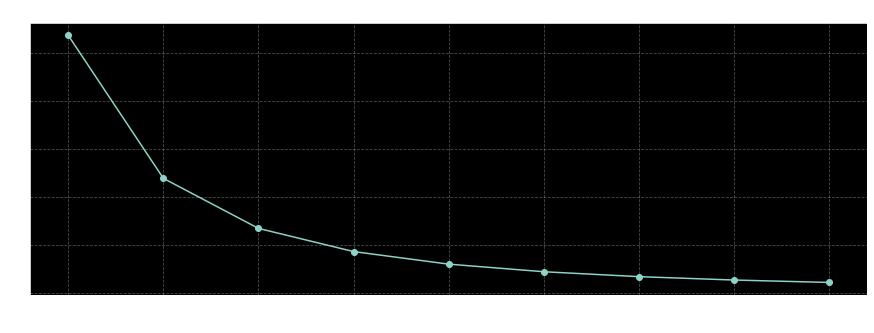

In [6]:
plt.figure(figsize=(15,5))
plt.plot(range(nc_min, nc_max+1), inertias, '-o')
plt.title("elbow curve")
plt.xlabel("# of clusters")
plt.grid(ls='--', alpha=0.3)

In [22]:
x_norm = sklearn.preprocessing.StandardScaler().fit_transform(df.drop(["molecule_name", "atom_index"], axis=1))

# nro de ejes-PCA q queremos
ncol = 3 #merged.shape[1]

pca = sklearn.decomposition.PCA(n_components=ncol)
columns_pca = ['PCA-%d' % _ for _ in range(ncol)]

x_pca = pd.DataFrame(
    data = pca.fit_transform(x_norm),
    columns = columns_pca,
)

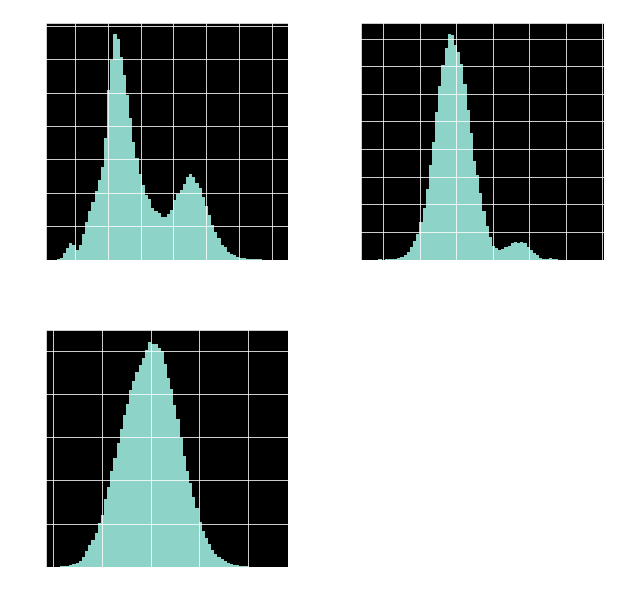

In [23]:
x_pca.hist(figsize=(10,10), bins=70);

# > Parece q no PCA no encuentra una separacion razonable...

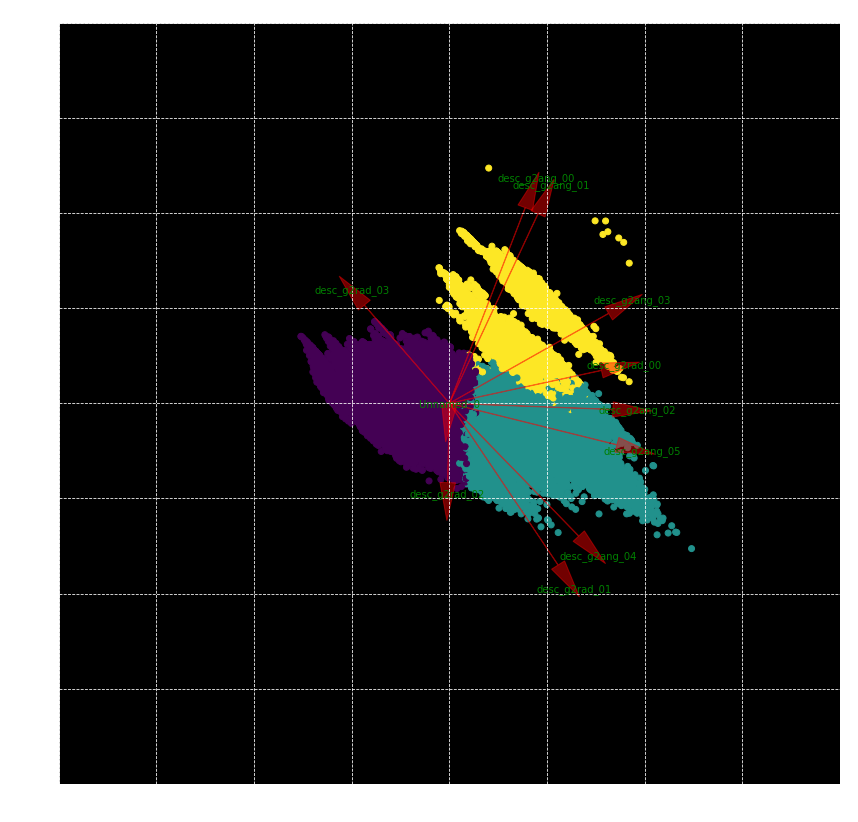

In [24]:
kmeans = sklearn.cluster.KMeans(n_clusters=3)
kmeans.fit(x_norm) # corresponde a solo la data training

plt.figure('3 Cluster K-Means', figsize=(14,14))
#plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=kmeansoutput.labels_)
#biplot(principalComponents,pca.components_,1,2,kmeansoutput.labels_,labels=kmeansoutput.labels_)
fig, ax = ff.biplot(
    score = x_pca.values[:,0:2],
    coeff = np.transpose(pca.components_[0:2, :]),
    labels = df.drop(["molecule_name", "atom_index"], axis=1).columns,
    color = kmeans.labels_
)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('3 Cluster K-Means');
#fig.show()